<a href="https://colab.research.google.com/github/hirajya/ML_Artists_Classifier/blob/main/ML_Artist_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
img = cv2.imread('/content/drive/MyDrive/datasetspicsML/daniel padilla - Google Search/MV5BYWRjZDYyYWUtNjk4Yi00Njk3LThmYjAtNTk1N2VlZDYwZThlXkEyXkFqcGdeQXVyNTI5NjIyMw@@.jpg')
img.shape

(800, 533, 3)

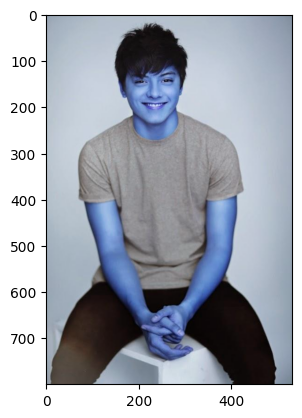

In [40]:
plt.imshow(img)

In [41]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(800, 533)

In [42]:
gray

array([[164, 164, 164, ..., 138, 138, 138],
       [164, 164, 165, ..., 139, 138, 138],
       [164, 165, 165, ..., 139, 139, 139],
       ...,
       [158, 158, 158, ..., 135, 135, 134],
       [157, 157, 158, ..., 135, 134, 134],
       [156, 157, 158, ..., 135, 134, 134]], dtype=uint8)

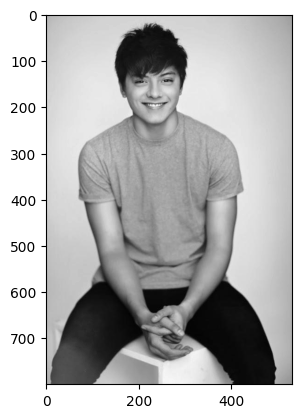

In [43]:
plt.imshow(gray, cmap='gray')

In [44]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencvFile/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencvFile/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[174, 102, 122, 122]], dtype=int32)

In [45]:
(x, y, w, h) = faces[0]
x, y, w, h

(174, 102, 122, 122)

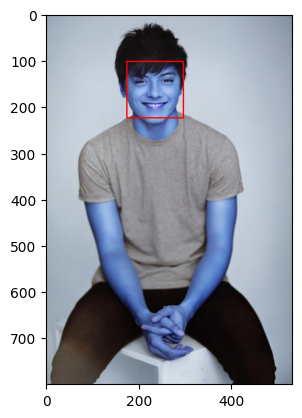

In [46]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

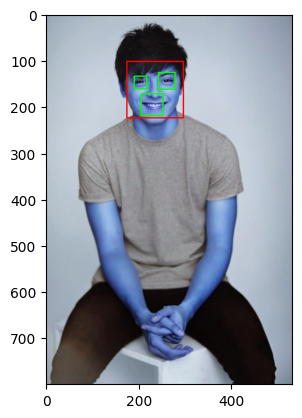

In [47]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
  face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
  roi_gray = gray[y: y+h, x:x+w]
  roi_color = face_img[y: y+h, x: x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray)
  for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

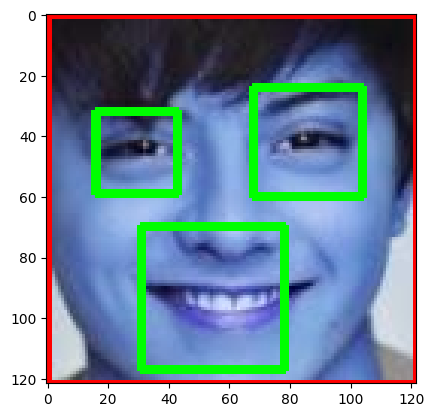

In [48]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [49]:
def get_cropped_image_if_2_eyes(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return None

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            roi_color = img[y:y + h, x:x + w]

            # You can add additional checks here to verify if the detected face has two eyes
            # For example, using eye cascades or other methods.
            return roi_color

    except Exception as e:
        print("Error processing image:", image_path)
        print("Error:", e)
        return None

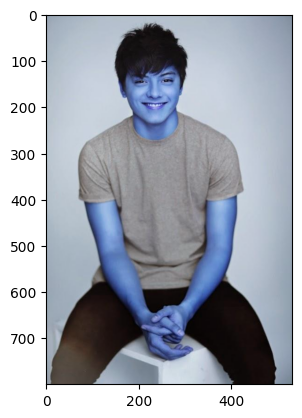

In [50]:
orig_img = cv2.imread('/content/drive/MyDrive/datasetspicsML/daniel padilla - Google Search/MV5BYWRjZDYyYWUtNjk4Yi00Njk3LThmYjAtNTk1N2VlZDYwZThlXkEyXkFqcGdeQXVyNTI5NjIyMw@@.jpg')

plt.imshow(orig_img)

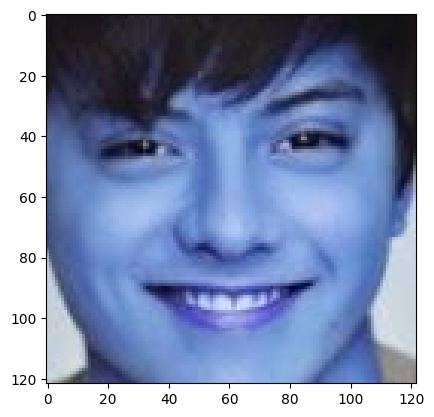

In [51]:
cropped_img = get_cropped_image_if_2_eyes('/content/drive/MyDrive/datasetspicsML/daniel padilla - Google Search/MV5BYWRjZDYyYWUtNjk4Yi00Njk3LThmYjAtNTk1N2VlZDYwZThlXkEyXkFqcGdeQXVyNTI5NjIyMw@@.jpg')
plt.imshow(cropped_img)

In [52]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/content/drive/MyDrive/datasetspicsML/daniel padilla - Google Search/MV5BYWRjZDYyYWUtNjk4Yi00Njk3LThmYjAtNTk1N2VlZDYwZThlXkEyXkFqcGdeQXVyNTI5NjIyMw@@.jpg')
cropped_image_no_2_eyes

array([[[ 24,  20,  26],
        [ 24,  20,  26],
        [ 25,  21,  26],
        ...,
        [ 23,  20,  22],
        [ 25,  20,  22],
        [ 25,  20,  22]],

       [[ 24,  20,  26],
        [ 24,  20,  26],
        [ 25,  21,  26],
        ...,
        [ 23,  20,  22],
        [ 25,  20,  22],
        [ 25,  20,  22]],

       [[ 26,  22,  28],
        [ 24,  20,  26],
        [ 22,  18,  23],
        ...,
        [ 22,  19,  21],
        [ 24,  19,  21],
        [ 24,  19,  21]],

       ...,

       [[204, 213, 226],
        [207, 217, 227],
        [205, 215, 222],
        ...,
        [151, 145, 146],
        [146, 141, 142],
        [136, 131, 132]],

       [[198, 207, 220],
        [198, 208, 218],
        [193, 204, 208],
        ...,
        [151, 146, 145],
        [148, 142, 143],
        [138, 133, 134]],

       [[189, 198, 208],
        [186, 196, 203],
        [168, 178, 178],
        ...,
        [151, 147, 146],
        [152, 146, 147],
        [143, 138, 139]]

In [53]:
path_to_data = "/content/drive/MyDrive/datasetspicsML"
path_to_cr_data = "/content/drive/MyDrive/cropped"

In [54]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

In [55]:
img_dirs

['/content/drive/MyDrive/datasetspicsML/chris evans - Google Search',
 '/content/drive/MyDrive/datasetspicsML/daniel padilla - Google Search',
 '/content/drive/MyDrive/datasetspicsML/enrique gil - Google Search',
 '/content/drive/MyDrive/datasetspicsML/kathryn bernardo - Google Search',
 '/content/drive/MyDrive/datasetspicsML/manny pacquiao - Google Search',
 '/content/drive/MyDrive/datasetspicsML/taylor swift - Google Search']

In [56]:
import shutil
if os.path.exists(path_to_cr_data):
  shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [57]:
import cv2
import os

# Define the path to the directory where you want to save the cropped data
path_to_cr_data = "/content/drive/MyDrive/cropped"



cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_place = img_dir.split('/')[-1]
    celebrity_name = (celebrity_place.split('-')[0]).strip()
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


chris evans
Generating cropped images in folder: /content/drive/MyDrive/cropped/chris evans
daniel padilla
Generating cropped images in folder: /content/drive/MyDrive/cropped/daniel padilla
enrique gil
Generating cropped images in folder: /content/drive/MyDrive/cropped/enrique gil
kathryn bernardo
Generating cropped images in folder: /content/drive/MyDrive/cropped/kathryn bernardo
manny pacquiao
Generating cropped images in folder: /content/drive/MyDrive/cropped/manny pacquiao
taylor swift
Generating cropped images in folder: /content/drive/MyDrive/cropped/taylor swift


# Manually Cleaning the pics

In [58]:
import numpy as np
import pywt
import cv2


In [59]:
def w2d(img, mode='haar', level=1):
  imArray = img

  # convert to grayscale
  imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)

  # convert to float
  imArray = np.float32(imArray)
  imArray /= 255

  # compute coefficients
  coeffs = pywt.wavedec2(imArray, mode, level=level)

  # process coefficients
  coeffs_H = list(coeffs)
  coeffs_H[0] *= 0

  # reconstruction
  imArray_H = pywt.waverec2(coeffs_H, mode)
  imArray_H *= 255
  imArray_H = np.uint8(imArray_H)

  return imArray_H

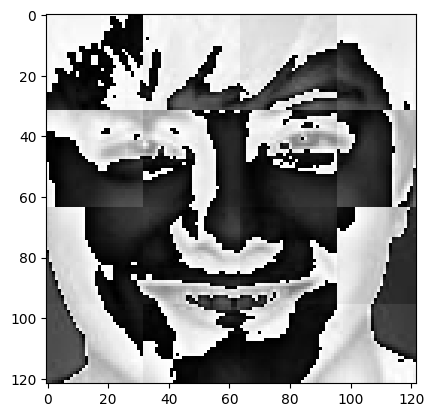

In [60]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [62]:
celebrity_file_names_dict

{'chris evans': ['/content/drive/MyDrive/cropped/chris evans/chris evans1.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans2.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans3.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans4.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans5.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans6.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans7.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans8.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans9.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans10.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans11.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans12.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans13.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans14.png',
  '/content/drive/MyDrive/cropped/chris evans/chris evans15.png',
  '/

In [63]:
class_dict = {}

count = 0
for celebrity_name in celebrity_file_names_dict.keys():
  class_dict[celebrity_name] = count
  count = count + 1
class_dict

{'chris evans': 0,
 'daniel padilla': 1,
 'enrique gil': 2,
 'kathryn bernardo': 3,
 'manny pacquiao': 4,
 'taylor swift': 5}

In [64]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
  for training_image in training_files:
    img = cv2.imread(training_image)
    if img is None:
      continue
    scalled_raw_img = cv2.resize(img, (32, 32)) # resizing scaling
    img_har = w2d(img, 'db1', 5)
    scalled_img_har = cv2.resize(img_har, (32, 32)) # resizing har
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
    X.append(combined_img)
    y.append(class_dict[celebrity_name])


In [66]:
len(X)

345

In [70]:
32*32*3 + 32*32

4096

In [69]:
len(X[0])

4096

In [68]:
y[:5]

[0, 0, 0, 0, 0]

In [71]:
X[0]

array([[ 47],
       [ 50],
       [ 65],
       ...,
       [169],
       [ 36],
       [ 83]], dtype=uint8)

In [72]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(345, 4096)

In [73]:
X[0]

array([ 47.,  50.,  65., ..., 169.,  36.,  83.])

In [74]:
import joblib

# Save X and y to a file
joblib.dump(X, 'X_data.joblib')
joblib.dump(y, 'y_data.joblib')


['y_data.joblib']

In [ ]:
# import joblib

# # Load X and y from the files
# X = joblib.load('X_data.joblib')
# y = joblib.load('y_data.joblib')
